In [1]:
from matplotlib import pyplot as plt
import numpy as np
#from sympy import *
#from sympy import MatrixSymbol, Matrix
import math
import cmath

spessori e lambda per trovare resistenze. 

In [24]:
# INPUT DATI:

# da interno a esterno
spessori = np.array([0.2,0.1,0.005])
trasmittanze = np.array([1.8,0.04,1.])
mu = np.array([6,10,8])
densità = np.array([2400.,30.,1200.])
caloreSpecifico = np.array([1000.,1400.,1500.])


Ti=20.
Te=0.
URi=0.65
URe=0.9 #0.9 forse

# in orizzontale:
Rsi=0.130
Rse=0.040

# Tempo dinamica
T = 24 # ore -> secondi=86400

print("Spessore totale = ",sum(spessori))

Spessore totale =  0.30500000000000005


In [3]:
# Spessori equivalenti (metri)
Sd = spessori * mu 
Sdtot = sum(Sd)
SdCumSum = Sd.cumsum()
SdCumSum = np.insert(SdCumSum,0,0.)
print(Sd)
print(Sdtot)
print(SdCumSum)

[1.2  1.   0.04]
2.24
[0.   1.2  2.2  2.24]


In [4]:
resistenze=spessori/trasmittanze
# Aggiunge le resistenze superficiali al vettore resistenze e calcola la somma cumolata
resistenze = np.insert(resistenze,0,Rsi)
resistenze = np.append(resistenze,Rse)
resistenze = np.array(resistenze)
Rtot = sum(resistenze)
resistenzeCumSum = resistenze.cumsum()

print(resistenze)
print(resistenzeCumSum)
print(Rtot)
print(1/Rtot)

[0.13       0.11111111 2.5        0.005      0.04      ]
[0.13       0.24111111 2.74111111 2.74611111 2.78611111]
2.786111111111111
0.3589232303090728


In [5]:
# Calcola le temperature superficiali i-esimme

deltaT=Ti-Te
temperature=np.array([])

for i in range(0,len(resistenze)):
    T=Ti-((resistenzeCumSum[i]*deltaT)/Rtot)
    temperature = np.append(temperature,T)

# Ritorna alla dimensione inziale aggiungendo la Ti all'inizio. L'ultima è già la Te    
temperature = np.insert(temperature,0,Ti)

print("Temperature superficiali = ",temperature)     

Temperature superficiali =  [20.         19.0667996  18.26919242  0.32303091  0.28713858  0.        ]


In [6]:
# Pressione di saturazione per ogni temperatura i-esima
pressioniSaturazione=610.5*10**(7.5*temperature/(237.3+temperature))

print("pressioni saturazione = ",pressioniSaturazione) 

pressioni saturazione =  [2337.02166166 2205.38335866 2098.06114694  625.00193609  623.37571143
  610.5       ]


In [7]:
temperature[5]

0.0

In [8]:
Pi = URi * pressioniSaturazione[0]
Pe = URe * pressioniSaturazione[-1]
deltaP = Pi - Pe
pressioni = np.array([])
for p in range(1,len(temperature)-2): #valori interni a T perché conosciamo già gli estremi
    P=Pi-((SdCumSum[p]*deltaP)/Sdtot)
    pressioni = np.append(pressioni,P)

# Ritorna alla dimensione inziale aggiungendo la Pi all'inizio. L'ultima è già la Pe    
pressioni = np.insert(pressioni,0,Pi)

print("Pi = ", Pi)
print("Pe = ", Pe)
print("Pressioni interne = ", pressioni)

Pi =  1519.06408007576
Pe =  549.45
Pressioni interne =  [1519.06408008  999.62796575  566.76453714  549.45      ]


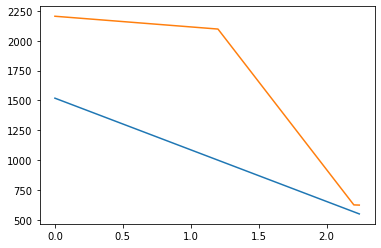

In [9]:
plt.plot(SdCumSum,pressioni)
plt.plot(SdCumSum,pressioniSaturazione[1:-1])

[0.    0.2   0.1   0.005 0.   ]
[0.    0.    0.2   0.3   0.305 0.305]
[20.         19.0667996  18.26919242  0.32303091  0.28713858  0.        ]


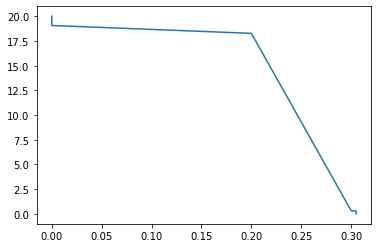

In [11]:
spess=spessori
spess=np.insert(spess,0,0)
spess=np.append(spess,0)
spesss=np.cumsum(spess)
spesss=np.insert(spesss,0,0)
print(spess)
print(spesss)
print(temperature)
plt.plot(spesss,temperature)



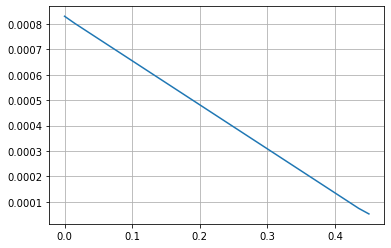

In [12]:
s=np.array([0. ,0.015, 0.435, 0.45])
t=np.array([16.61502409, 16.05780497,  1.47637026,  1.04153105])
t=.00005*t
plt.plot(s,t)
plt.grid(True)


spesss= [0.    0.2   0.3   0.305]
pSat= [2205.38335866 2098.06114694  625.00193609  623.37571143]


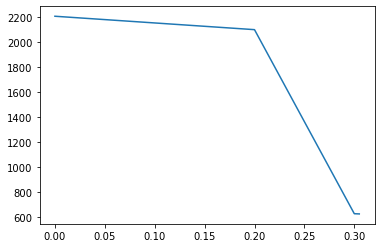

In [13]:
print("spesss=",spesss[1:-1])
print("pSat=",pressioniSaturazione[1:-1])
plt.plot(spesss[1:-1],pressioniSaturazione[1:-1])

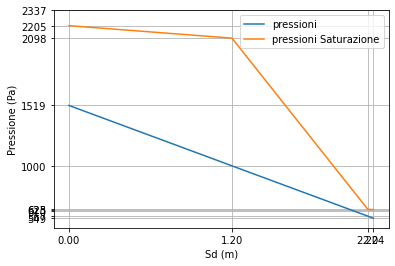

In [14]:
plt.plot(SdCumSum,pressioni,label="pressioni")
plt.plot(SdCumSum,pressioniSaturazione[1:-1], label="pressioni Saturazione")
plt.legend(loc="best")
plt.xlabel("Sd (m)")  
plt.ylabel("Pressione (Pa)")
plt.grid()
plt.xticks(SdCumSum)
plt.yticks(np.hstack((pressioni,pressioniSaturazione))) #i due vettori affiancati
plt.show()

In [15]:
np.hstack((pressioni,pressioniSaturazione))

array([1519.06408008,  999.62796575,  566.76453714,  549.45      ,
       2337.02166166, 2205.38335866, 2098.06114694,  625.00193609,
        623.37571143,  610.5       ])

In [16]:
pressioni

array([1519.06408008,  999.62796575,  566.76453714,  549.45      ])

In [17]:
pressioniSaturazione

array([2337.02166166, 2205.38335866, 2098.06114694,  625.00193609,
        623.37571143,  610.5       ])

In [25]:
profonditàPenetrazione = np.sqrt((trasmittanze*T*3600)/(  math.pi*densità * caloreSpecifico))
xi = spessori/profonditàPenetrazione
print("delta = ",profonditàPenetrazione)
print("xi = ",xi)

# Calcola le matrice di trasferimento di ogni strato e le inserisce in una lista, 
# per poi moltiplicarle tra di loro in Z

zz = [] # zz : lista di matrici z
for i in range(0,len(xi)):
    # z : matrice per ogni strato
    z = np.zeros((2,2),dtype=np.complex128) # matrice complex float
    z[0][0] = complex(  (np.cosh(xi[i])*np.cos(xi[i])) , (np.sinh(xi[i])*np.sin(xi[i]))  )
    z[1][1] = z[0][0] 
    z[0][1] = -(profonditàPenetrazione[i]/(2*trasmittanze[i])) * complex(  (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i])) , (np.cosh(xi[i])*np.sin(xi[i]) - np.sinh(xi[i])*np.cos(xi[i]))  )
    z[1][0] = -(trasmittanze[i]/( profonditàPenetrazione[i]))  * complex(  (np.sinh(xi[i])*np.cos(xi[i]) - np.cosh(xi[i])*np.sin(xi[i])) , (np.sinh(xi[i])*np.cos(xi[i]) + np.cosh(xi[i])*np.sin(xi[i]))  )
    # aggiunge alla lista zz
    zz.append(z)
print("zz = ",zz)

# Z: matrice di trasferimento totale  del componente edilizio = Z_N * Z_n-1 * ... * Z_1   
Z = np.zeros((2,2),dtype=np.complex128)
Z = zz[-1] #Z_N
for i in range(1,len(zz)): # [1  2 ... N  N+1)
    Z = Z.dot(zz[-1-i]) # prodotto scalare
print("Z =",Z)   

delta =  [0.14361922 0.16184053 0.12360774]
xi =  [1.39257126 0.6178922  0.04045054]
zz =  [array([[ 0.37882036 +1.8584634j , -0.09725179 -0.07054045j],
       [22.16093671-30.55254974j,  0.37882036 +1.8584634j ]]), array([[ 0.9757144 +0.3811725j , -2.48785533-0.31793816j],
       [ 0.03884347-0.30394887j,  0.9757144 +0.3811725j ]]), array([[ 9.99999554e-01+1.63624613e-03j, -4.99999955e-03-2.72707692e-06j],
       [ 3.56973534e-04-6.54498411e-01j,  9.99999554e-01+1.63624613e-03j]])]
Z = [[-65.47111655+70.92248954j  -0.40981446 -4.86053266j]
 [ 80.27836508+21.33833759j  -3.541659   +2.2568288j ]]


In [26]:
# Strato d'aria interno 
Zsi = np.zeros((2,2),dtype=np.complex128)
Zsi[0][0] = complex(1,0)
Zsi[1][1] = complex(1,0)
Zsi[0][1] = complex(-Rsi)
Zsi[1][0] = complex(0,0)
print("Zsi = ",Zsi)

# Strato d'aria esterno
Zse = np.zeros((2,2),dtype=np.complex128)
Zse[0][0] = complex(1,0)
Zse[1][1] = complex(1,0)
Zse[0][1] = complex(-Rse)
Zse[1][0] = complex(0,0)
print("Zse = ",Zse)

# Zee: matrice di trasferimento da ambiente ad ambiente 
Zee = Zse.dot(Z)
Zee = Zee.dot(Zsi)
print("Zee = ",Zee)

Zsi =  [[ 1.  +0.j -0.13+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zse =  [[ 1.  +0.j -0.04+0.j]
 [ 0.  +0.j  1.  +0.j]]
Zee =  [[-68.68225115+70.06895604j   8.66054455-14.0597701j ]
 [ 80.27836508+21.33833759j -13.97784646 -0.51715508j]]


In [21]:
Y12 = -1/Zee[0][1]
Y12 = np.sqrt((Y12.real)**2 + (Y12.imag)**2) # il modulo
print("Y12 = ", Y12, "(trasmittanza termica periodica)")

f = -np.sqrt((Y12.real)**2 + (Y12.imag)**2)/(1/Rtot)
print("f = ", f, "(attenuazione)")

phase = (math.atan2(Zee[0][1].imag,Zee[0][1].real))*T/(2*math.pi) # T in ore
sfasamento = phase+T/2 # T in ore
print("phase = ", phase)
print("sfasamento = ", sfasamento, "[ore]")

Y11 = -Zee[0][0]/Zee[0][1]
Y11 = np.sqrt((Y11.real)**2 + (Y11.imag)**2) # il modulo
print("Y11 = ", Y11, "(ammettenza termica interna Yii)")

Y22 = -Zee[1][1]/Zee[0][1]
Y22 = np.sqrt((Y22.real)**2 + (Y22.imag)**2) # il modulo
print("Y22 = ", Y22, "(ammettenza termica esterna Yee)")

Y12 =  0.06055801506207261 (trasmittanza termica periodica)
f =  -0.16872135863127452 (attenuazione)
phase =  -3.891182643952371
sfasamento =  8.108817356047629 [ore]
Y11 =  5.941759819168738 (ammettenza termica interna Yii)
Y22 =  0.8470497907097971 (ammettenza termica esterna Yee)


In [22]:
massaSuperficiale = sum(spessori*densità)
print("Massa superficiale = ", massaSuperficiale)

capacitàTermicaAreica = spessori*densità*caloreSpecifico
print(capacitàTermicaAreica, "Totale = ", sum(capacitàTermicaAreica) )

Massa superficiale =  489.0
[480000.   4200.   9000.] Totale =  493200.0
